<a href="https://colab.research.google.com/github/Subho-Halder/Statistics-Project/blob/main/STS_Project_Term1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library 

In [ ]:
 pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=af6879847b5c94649cb2fafac8b42fbc6bc2651d605a9d6e98ed4241c034183a
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [ ]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from pandas.plotting import scatter_matrix
import seaborn as sns

##Getting the Data

In [ ]:
data1=get_history(symbol="HINDUNILVR", start=date(2022,3,1), end=date(2022,8,30))
data2=get_history(symbol="ITC", start=date(2022,3,1), end=date(2022,8,30))
data3=get_history(symbol="COLPAL", start=date(2022,3,1), end=date(2022,8,30))
data4=pd.read_csv('/content/NIFTY50_DATA.csv')

FileNotFoundError: ignored

In [ ]:
data4=get_history(symbol="NIFTY", start=date(2022,3,1), end=date(2022,8,30), index=True)

In [ ]:
data4.head()

In [ ]:
df = pd.concat([data1, data3], axis=0)
datatoexcel = pd.ExcelWriter('StockMain.xlsx')
file_name = 'StockMain.xlsx'  
df.to_excel(file_name)


In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data4.iloc[:, 0:13], orient = 'h')

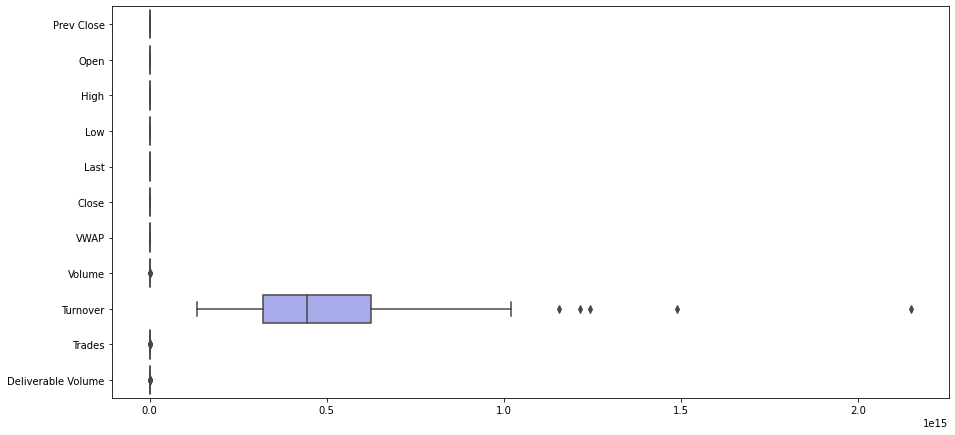

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data2.iloc[:, 0:13], orient = 'h')

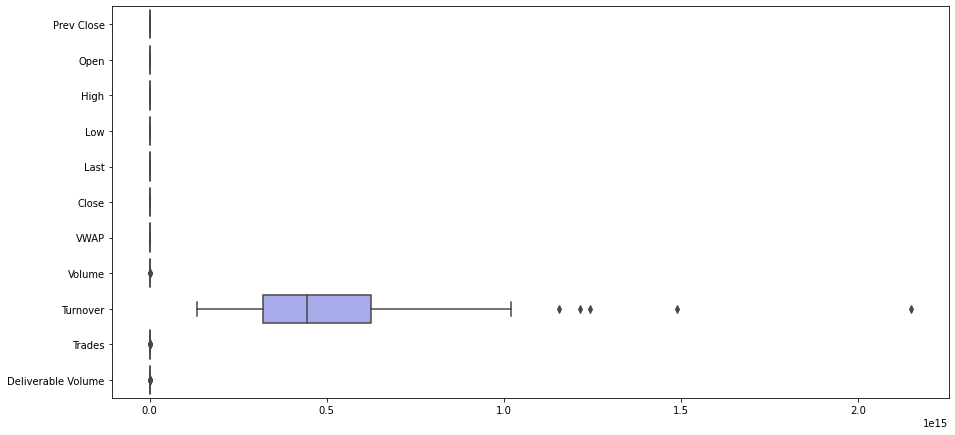

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data2.iloc[:, 0:13], orient = 'h')

Combining the Data for analysis

In [ ]:
df = pd.concat([data1, data2, data3,data4], axis=0)
df.head()

NameError: ignored

In [ ]:
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2022-03-02,2149.10,HINDUNILVR
1,2022-03-03,2091.00,HINDUNILVR
2,2022-03-04,2019.50,HINDUNILVR
3,2022-03-07,1943.95,HINDUNILVR
4,2022-03-08,1949.00,HINDUNILVR


In [ ]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,COLPAL,HINDUNILVR,ITC
0,2022-03-02,1447.50,2149.10,215.30
1,2022-03-03,1441.35,2091.00,219.40
2,2022-03-04,1439.30,2019.50,225.50
3,2022-03-07,1401.25,1943.95,224.95
4,2022-03-08,1430.40,1949.00,226.90


In [ ]:
df_pivot.tail()

Symbol,Date,COLPAL,HINDUNILVR,ITC
119,2022-08-24,1588.55,2588.25,314.10
120,2022-08-25,1570.50,2574.20,312.35
121,2022-08-26,1571.25,2571.55,312.90
122,2022-08-29,1630.00,2575.80,313.55
123,2022-08-30,1674.95,2659.85,320.50


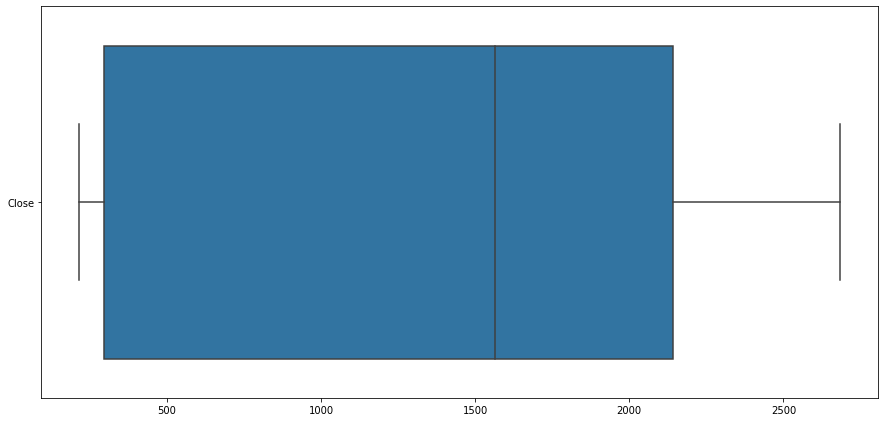

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df.iloc[:, 0:13], orient = 'h')

Evaluating the Correlation between the stocks.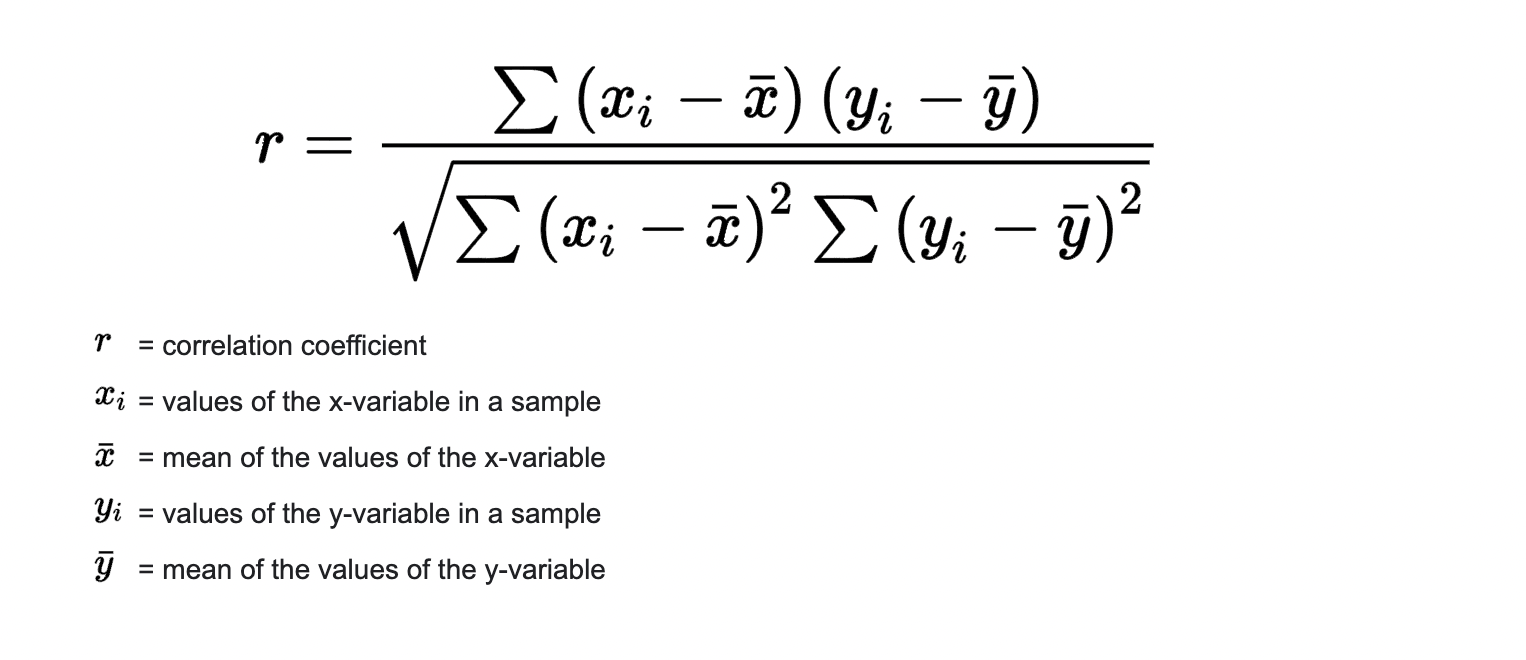

In [ ]:
corr_df = df_pivot.corr(method='pearson')
#reset 'Symbol' as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,COLPAL,HINDUNILVR,ITC
Symbol,,,
COLPAL,1.000000,0.477111,0.499930
HINDUNILVR,0.477111,1.000000,0.934518
ITC,0.499930,0.934518,1.000000


##Plotting the HeatMap

<Figure size 432x288 with 0 Axes>

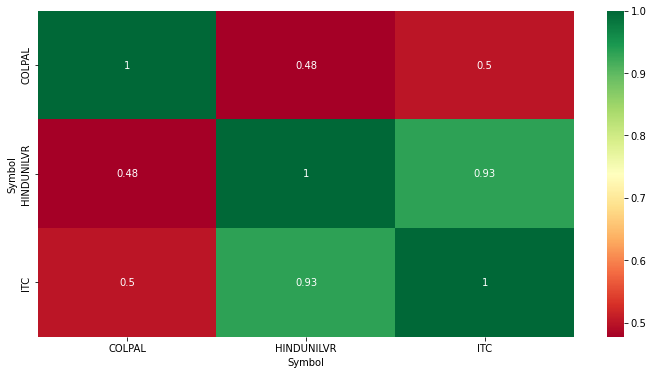

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

##Scatter Matrix


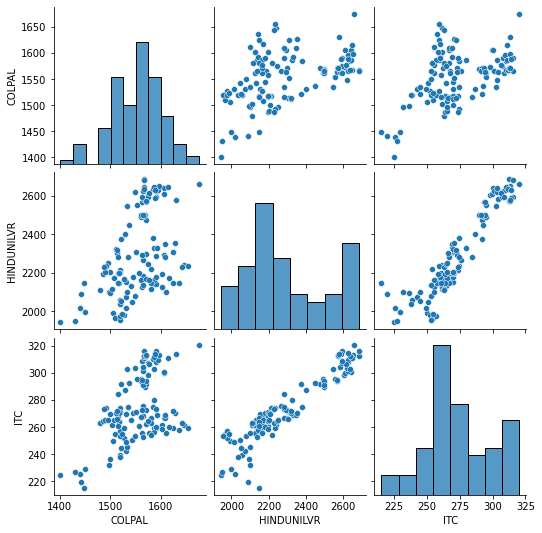

In [ ]:
import seaborn as sns
sns.pairplot(df_pivot, diag_kind="hist")

Text(0.5, 1.0, 'HUL, ITC and COLPAL')

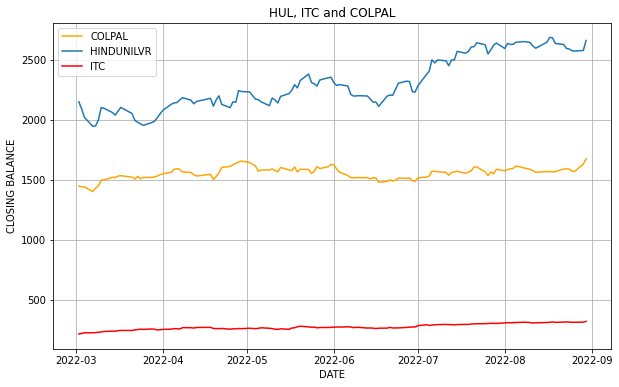

In [ ]:
from matplotlib import rcParams
plt.plot(df_pivot.Date, df_pivot.COLPAL, color = "ORANGE", label = "COLPAL")
plt.plot(df_pivot.Date, df_pivot.HINDUNILVR, label = "HINDUNILVR")
plt.plot(df_pivot.Date, df_pivot.ITC, color = "RED", label = "ITC")
plt.xlabel("DATE")
plt.ylabel("CLOSING BALANCE")
rcParams['figure.figsize'] = 10,8
plt.legend()
plt.grid("True")
plt.title("HUL, ITC and COLPAL")